# LOGISTIC REGRESSION WORKFLOW (UNESCO DATASET)
Status: **DONE, SAVED MODEL AND VECTORIZER**

In [1]:
# IMPORT LIBRARIES
import sys
import os
import pandas as pd
import importlib
import joblib
from sklearn.linear_model import LogisticRegression
# Adding project root directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../..")))

# import logistic regression training function
from classical_models.unesco_classical import train_text_model

# import evaluation function
from shared.metrics import compute_classic_metrics, plot_confusion_matrix, save_evaluation_report

importlib.reload(sys.modules['classical_models.unesco_classical']) 
importlib.reload(sys.modules['shared.metrics'])

<module 'shared.metrics' from 'c:\\Users\\mosqu\\personal-projects\\dss_pit\\src\\shared\\metrics.py'>

In [7]:
# LOAD CLEANED DATA
df = pd.read_csv("../../../data/unesco/cleaned_dataset.csv")

# Fix: ensure no NaN text
df["combined_text"] = df["combined_text"].astype(str).fillna("")

# clean mislabeled/rare entries
df["Misinfo_Type"] = df["Misinfo_Type"].replace({
    "Conspiracy, False reporting": "Conspiracy"   
})

X = df["combined_text"]
y = df["Misinfo_Type"]

# Drop rows where labels are NaN
mask = y.notna() & X.notna()
X = X[mask]
y = y[mask]

df.head(5)

,combined_text,Misinfo_Type
0,india middle youtube frenzy going get people k...,Conspiracy
1,tweet false reporting shooting people virus ch...,False reporting
2,tweet woman eating delicacy attributing virus ...,False reporting
3,tweet false chain message need containment act...,False reporting
4,hoax alert viral emergency notification fake c...,False reporting


In [106]:
# RUN MODEL
results = train_text_model(LogisticRegression(max_iter=3000, class_weight='balanced'), X_text=X,y=y,max_features=5000,ngram_range=(1,2),merge_small_classes=True,min_samples=5,oversample_method='random')

[INFO] Merging small classes: ['False Reporting', 'false reporting', 'Fake remedy, false reporting', 'False reporting, Fake remedy', 'Conspiracy, Fake remedy', 'Fake remedy, False reporting', 'False reporting, Conspiracy', 'Fake remedy, conspiracy']
[INFO] Oversampling method selected: random
  Before oversampling: {'False reporting': 3309, 'Conspiracy': 777, 'Fake remedy': 401}
  After oversampling: {'False reporting': 3309, 'Fake remedy': 3309, 'Conspiracy': 3309}


In [109]:
# EVALUATE MODEL
y_test = results["y_test"]
y_pred = results["y_pred"]

metrics = compute_classic_metrics(y_test, y_pred)
print("Accuracy:", metrics["accuracy"])
print("F1 Score:", metrics["f1_score"])
print(metrics["report"])

Accuracy: 0.7825311942959001
F1 Score: 0.7826244602152056
                 precision    recall  f1-score   support

     Conspiracy       0.52      0.51      0.51       194
    Fake remedy       0.65      0.74      0.69       101
False reporting       0.86      0.85      0.86       827

       accuracy                           0.78      1122
      macro avg       0.68      0.70      0.69      1122
   weighted avg       0.78      0.78      0.78      1122



<Figure size 800x600 with 0 Axes>

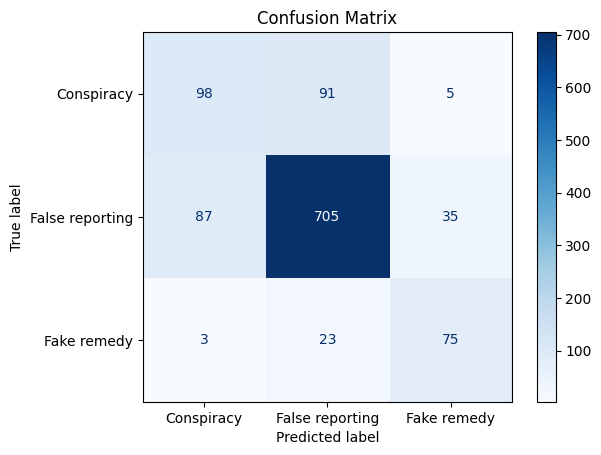

In [110]:
# CONFUSION MATRIX VISUALIZATION
plot_confusion_matrix(y_test, y_pred, labels=y_test.unique())

In [111]:
save_evaluation_report(metrics, "../../../classical_models/unesco_results/log_reg_evaluation_report.json")

Evaluation report saved to ../../../classical_models/unesco_results/log_reg_evaluation_report.json


In [112]:
# SAVING MODEL AND VECTORIZER (RUN ONCE)
joblib.dump(results["model"], "../../../shared/models/log_reg_unesco_model.pkl")
joblib.dump(results["vectorizer"], "../../../shared/vectorizers/log_reg_unesco_vectorizer.pkl")

['../../../shared/vectorizers/log_reg_unesco_vectorizer.pkl']